
# Project: Investigate a Dataset (No_Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Data features
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up theirappointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

Questions we are trying to answer :
1 - what is the relation between receiving a reminder SMS and showing up to the appointment?
2 - what is the relation between showing up to the appoointment and having a scholarship?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> trimming and cleaning the dataset for analysis. 

### General Properties

read and display data

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df = pd.DataFrame(df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


check for null values

In [9]:
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning 

Search for duplicates 

In [10]:
print("Num of dublicated : ", + sum(df.duplicated()))

Num of dublicated :  0


looking for negative or zero ages 

In [11]:
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


fix zero and negative ages 

In [15]:
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge

rename column typos

In [12]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

changing columns with dates to date time types

In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

replace yes and no with zero and one

In [16]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

<ipython-input-16-6fc7dec721ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
<ipython-input-16-6fc7dec721ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


In [17]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - what is the relation between receiving a reminder SMS and showing up to the appointment?

In [30]:
df_sms_received = df[(df['SMS_received'] == 1)]
df_no_sms_received = df[(df['SMS_received'] == 0)]

#Grouping by No-show, to calculate the amounts for each case.
sms_received = df_sms_received.groupby(['showed']).sum()['SMS_received']

df_no_sms_received.rename(columns={"SMS_received":"SMS_not_received"}, inplace=True)

df_no_sms_received['SMS_not_received'].replace({0: 1}, inplace = True)    

no_sms_received = df_no_sms_received.groupby(['showed']).sum()['SMS_not_received']

print(sms_received)
print(no_sms_received)

showed
False     9568.0
True     25017.0
Name: SMS_received, dtype: float64
showed
False    12112.0
True     60290.0
Name: SMS_not_received, dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


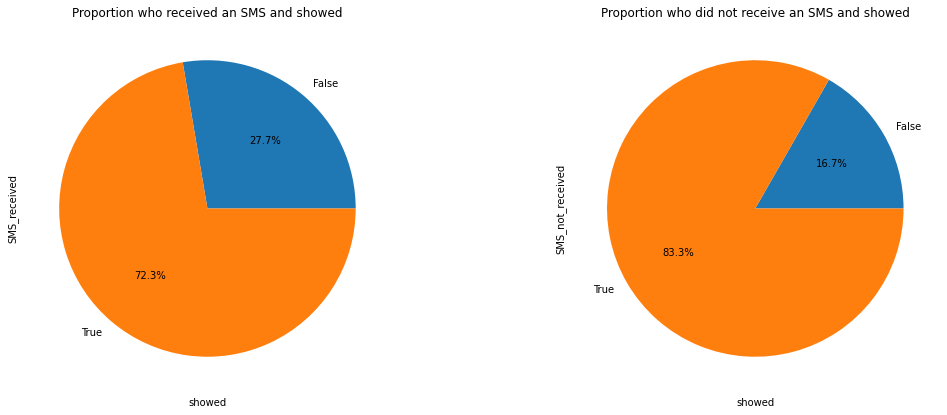

In [32]:
ms_received = sms_received / sum(sms_received) * 100
no_sms_received = no_sms_received / sum(no_sms_received) * 100

# Styling the graphs
fig = plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion who received an SMS and showed')
plt.xlabel('showed')

plt.subplot(2,2,2)
no_sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion who did not receive an SMS and showed')
plt.xlabel('showed');

There is no relation between receiving an sms and showing as we can see the percentage of patients who didn't receive an sms while showing were higher than the ones who received it 

### Research Question 2 - what is the relation between showing up to the appoointment and having a scholarship?

Scholarship
0.000000     0.801316
1.000000     0.762143
37.088874    0.000000
Name: showed, dtype: float64


Text(0.5, 1.0, 'relation between having a scholarship and showing up')

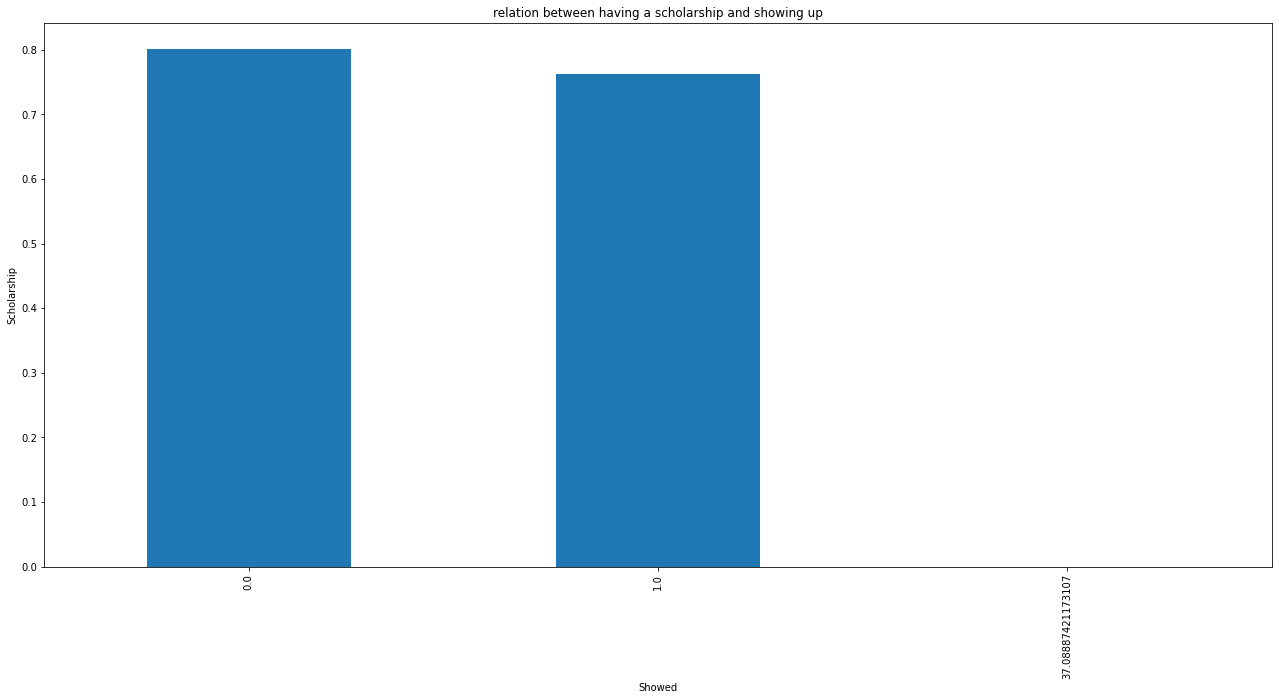

In [36]:
print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("relation between having a scholarship and showing up")

people who have scholarship ie "x value is 1" tend to show up lesser than people with no scholarships

<a id='conclusions'></a>
## Conclusions

> SMS reminders did not it's needed job properly as patients who received sms didn't show up more

> Patients with now Scholarships showed up with percentage 80.1316% while patients with scholarships showed up with percentage
76.2143%

> Most of the appointments where between april, may and june of 2016 which limits our conclusions to these months only. We cannot generalize these findings on all of the no show appointments on other months or years.
